In [2]:
raw_data <- read.csv("SSL_SCORE_FIRST_0719.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))
warn=-1

The Number of Rows in Initial Data is 391892

In [3]:
final_features<-raw_data[,c('SSL_SCORE','SSL_SCORE_RANK','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                            'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','RACE_CODE_CD',
                            'SHORT_LIST')]

In [4]:
complete_data <- final_features[complete.cases(final_features),]

In [5]:
complete_data$SHORT_LIST<-factor(complete_data$SHORT_LIST)
complete_data$PREDICTOR_RAT_AGE_AT_LATEST_ARREST<-factor(complete_data$PREDICTOR_RAT_AGE_AT_LATEST_ARREST)
complete_data$RACE_CODE_CD<-factor(complete_data$RACE_CODE_CD)
complete_data$PREDICTOR_RAT_GANG_AFFILIATION<-factor(complete_data$PREDICTOR_RAT_GANG_AFFILIATION)

In [6]:
n<-nrow(complete_data)

In [7]:
head(complete_data)

SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD,SHORT_LIST
500,1,20-30,0,1,4,1,1,1.0,1,0,1
500,1,less than 20,1,2,2,1,7,0.2,1,0,1
500,1,20-30,4,3,0,1,0,-1.1,0,1,1
500,1,less than 20,0,1,3,1,2,0.1,1,2,1
500,1,less than 20,1,2,6,0,0,0.0,0,0,1
500,1,less than 20,1,1,4,1,1,-0.3,2,0,1


In [8]:
set.seed(1234)
trainIndex = sample(1:n, size = round(0.8*n),replace=FALSE)
train_data = complete_data[trainIndex,]
test_data  = complete_data[-trainIndex,]

In [9]:
nrow(train_data)

[1] 313435

In [10]:
nrow(test_data)

[1] 78359

In [11]:
library(MatchIt)
library(dplyr)
library(ggplot2)
library(caret)

Warning message:
"package 'MatchIt' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'caret' was built under R version 3.3.3"Loading required package: lattice


In [12]:
ctrl <- trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE)

mod_fit <- train(SHORT_LIST ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST+PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS+RACE_CODE_CD,
            data=train_data, method="glm", family="binomial",
            preProcess="scale",trControl = ctrl, tuneLength = 5)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [13]:
summary(mod_fit)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.7091  -0.0617  -0.0044   0.0000   6.5607  

Coefficients:
                                                  Estimate Std. Error  z value
(Intercept)                                      -6.479973   0.048568 -133.420
`PREDICTOR_RAT_AGE_AT_LATEST_ARREST30-40`        -2.381835   0.065182  -36.541
`PREDICTOR_RAT_AGE_AT_LATEST_ARREST40-50`        -5.079898   0.309452  -16.416
`PREDICTOR_RAT_AGE_AT_LATEST_ARREST50-60`        -7.963347  22.674900   -0.351
`PREDICTOR_RAT_AGE_AT_LATEST_ARREST60-70`        -2.890780  15.202790   -0.190
`PREDICTOR_RAT_AGE_AT_LATEST_ARREST70-80`        -0.755980  15.856533   -0.048
`PREDICTOR_RAT_AGE_AT_LATEST_ARRESTless than 20`  1.745232   0.016626  104.973
PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS           0.359182   0.009629   37.302
PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT           1.145454   0.012088   94.761
PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES            1.021797   0.011121

In [14]:
predicted_values<-predict(mod_fit, newdata=test_data,type= "prob")[,2]  

In [15]:
library(ROCR)
pred <- prediction((predicted_values),(test_data$SHORT_LIST))

Warning message:
"package 'ROCR' was built under R version 3.3.3"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.3.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



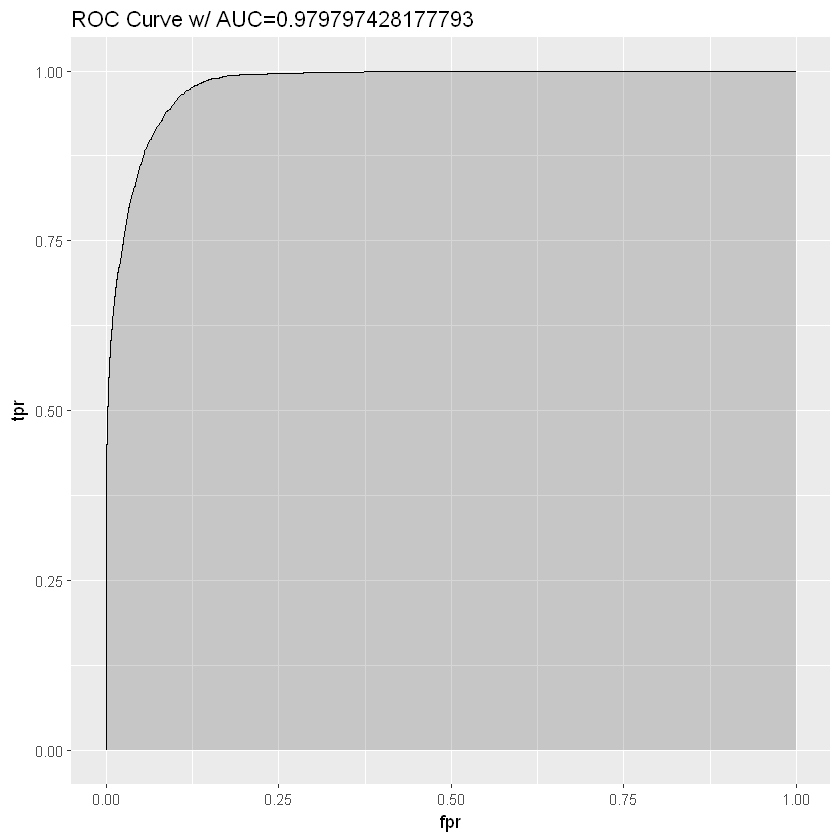

In [16]:
perf <- performance(pred, measure = "tpr", x.measure = "fpr")
auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]

roc.data <- data.frame(fpr=unlist(perf@x.values),
                       tpr=unlist(perf@y.values),
                       model="RF")

ggplot(roc.data, aes(x=fpr, ymin=0, ymax=tpr)) +
  geom_ribbon(alpha=0.2) +
  geom_line(aes(y=tpr)) +
  ggtitle(paste0("ROC Curve w/ AUC=", auc))


In [17]:
mod_match <- matchit(RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST+PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = complete_data)

In [18]:
mod_match


Call: 
matchit(formula = RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST + 
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + 
    PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + 
    PREDICTOR_RAT_UUW_ARRESTS, data = complete_data, method = "nearest")

Sample sizes:
          Control Treated
All        207800   82323
Matched     82323   82323
Unmatched  125477       0
Discarded       0       0


In [19]:
matched <- match.data(mod_match)

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

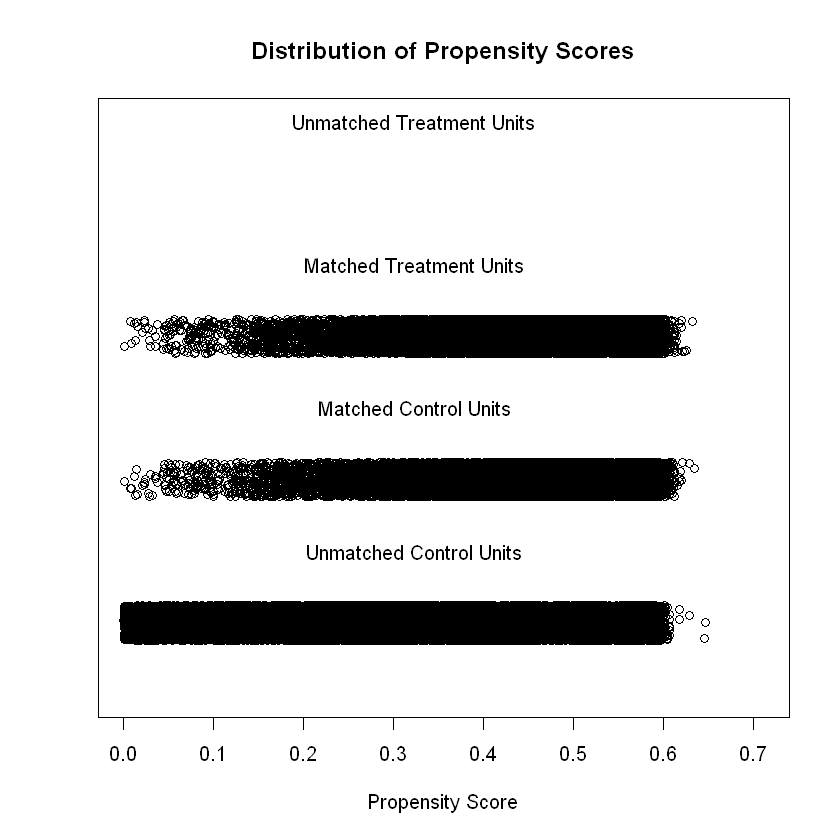

In [20]:
plot(mod_match, type = "jitter")

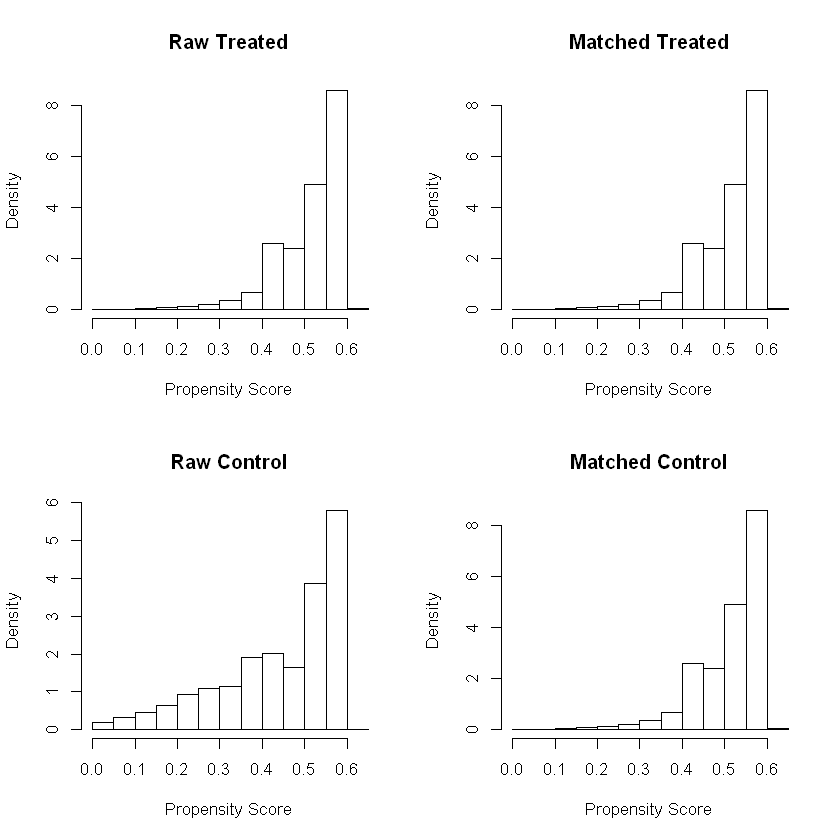

In [21]:
plot(mod_match, type = "hist")

In [22]:
warn=-1
ctrl <- trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE)

mod_fit_PSM <- train(SHORT_LIST ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST+PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS+RACE_CODE_CD,
            data=matched, method="glm", family="binomial",
            preProcess="scale",trControl = ctrl, tuneLength = 5)


Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: RACE_CODE_CD2"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: RACE_CODE_CD2"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: RACE_CODE_CD2"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, s

In [23]:
summary(mod_fit_PSM)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0652  -0.0413  -0.0045   0.0000   5.2024  

Coefficients: (1 not defined because of singularities)
                                                   Estimate Std. Error z value
(Intercept)                                      -6.816e+00  9.734e-02 -70.026
`PREDICTOR_RAT_AGE_AT_LATEST_ARREST30-40`        -2.174e+00  1.807e-01 -12.033
`PREDICTOR_RAT_AGE_AT_LATEST_ARREST40-50`        -8.723e+00  3.451e+01  -0.253
`PREDICTOR_RAT_AGE_AT_LATEST_ARREST50-60`        -2.421e+01  1.565e+05   0.000
`PREDICTOR_RAT_AGE_AT_LATEST_ARREST60-70`        -3.656e+00  4.338e+01  -0.084
`PREDICTOR_RAT_AGE_AT_LATEST_ARREST70-80`        -9.538e-01  3.827e+01  -0.025
`PREDICTOR_RAT_AGE_AT_LATEST_ARRESTless than 20`  1.671e+00  3.132e-02  53.369
PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS           1.360e-01  1.203e-02  11.303
PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT           6.400e-01  1.524e-02  41.986
PREDICTOR_RAT_ARRESTS_VIOLEN